In [ ]:
!git clone https://github.com/openai/guided-diffusion.git guided
%cd guided
!pip install -v -e .
%cd ..

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from tqdm.notebook import tqdm
from funcs import DDPM, NoisyClassifier, training_loop_classifier, show_images, return_dataloader

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
num_timesteps = 1000

In [ ]:
noisy_classifier = NoisyClassifier()

In [ ]:
dataloader = return_dataloader()

In [ ]:
# Train cell
learning_rate = 1e-3 # several times, different schemes
num_epochs = 50

noisy_classifier = noisy_classifier.to(device)
optimizer = torch.optim.Adam(noisy_classifier.parameters(), lr=learning_rate)
training_loop_classifier(noisy_classifier, dataloader, optimizer, num_epochs, num_timesteps, device=device)
torch.save(noisy_classifier.state_dict(), "noisy_classifier.pth")

Test

In [ ]:
noisy_classifier.load_state_dict(torch.load("noisy_classifier.pth"))

In [ ]:
model_ddpm = DDPM(None, num_timesteps, beta_start=0.0001, beta_end=0.02, device=device)

In [ ]:
for batch_images in dataloader:
  break

In [ ]:
batch = batch_images[0].to(device)
target = batch_images[1].to(device)

noise = torch.randn(batch.shape).to(device)
timesteps = torch.randint(0, num_timesteps, (batch.shape[0],)).long().to(device)

noisy = model_ddpm.add_noise(batch, noise, timesteps).to(device)



#logits = noisy_classifier(noisy, timesteps)
logits_true = noisy_classifier(batch, torch.randint(999, num_timesteps, (batch.shape[0],)).long().to(device))

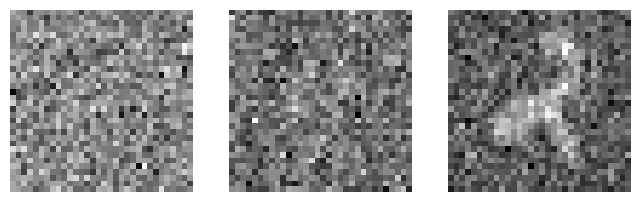

In [ ]:
show_images(noisy[:3])

In [ ]:
logits[:3]

tensor([[ 1.3984e-01,  5.4437e-01, -2.9572e-03, -2.2345e-02,  3.4082e-01,
          9.4372e-02,  2.7326e-01,  3.1738e-01,  1.3535e-01,  3.6256e-01],
        [-3.5554e+00, -4.5929e+00, -2.4795e+00, -3.2754e+00,  3.3043e+00,
         -1.5800e+00, -2.0669e+00,  1.3240e+00, -8.4880e-01,  5.8893e+00],
        [-5.4295e+00, -6.2097e-02,  1.2933e+01,  2.7229e+00,  2.2943e+00,
         -3.4554e+00, -2.3333e+00, -2.5135e-01,  3.6931e-01, -3.8962e+00]],
       grad_fn=<SliceBackward0>)

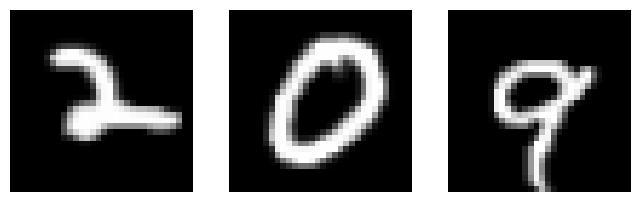

In [ ]:
show_images(batch[:3])

In [ ]:
logits_true[:3]

tensor([[ 0.1158,  2.3044,  2.3031,  0.3777, -0.2615, -0.1580, -0.1635,  2.5307,
         -1.1116, -0.3088],
        [ 3.2237,  1.0866,  1.2170, -1.2447, -1.7295, -0.5262,  1.0927,  0.3426,
          0.0546,  1.1499],
        [-2.1769,  1.1273,  0.1816, -0.4691,  0.8910, -0.4239, -1.6290,  3.3909,
         -0.4626,  2.3474]], grad_fn=<SliceBackward0>)

In [ ]:
torch.max(logits_true, 1)[1]

tensor([7, 0, 7,  ..., 1, 6, 6])

In [ ]:
target

tensor([2, 0, 9,  ..., 3, 6, 6])

In [ ]:
print(f'Accuracy of the network on the 2048 test images: {100 * (torch.max(logits_true, 1)[1] == target).sum().item() // target.size(0)} %')

Accuracy of the network on the 2048 test images: 72 %
